# Machine Learning

*Лектор: Екатерина Лобачева*

*Факультет экономических наук НИУ ВШЭ, 2017-18 учебный год*

[Страница курса](http://wiki.cs.hse.ru/Машинное_обучение_(факультет_экономических_наук%29)

## Домашнее задание №1
Задание основано на материалах курса [Data analysis (Software Engineering)](http://wiki.cs.hse.ru/Data_analysis_(Software_Engineering%29) (ФКН НИУ ВШЭ).

Вам необходимо анализировать набор данных [adult.data](http://archive.ics.uci.edu/ml/datasets/Adult) (источник: UCI Machine Learning Repository) с помощью Python, pandas, numpy, scipy.

Чтобы выполнить работу, скачайте настоящий ipynb-файл, откройте его в *Jupyter Notebook*, впишите решения в оставленные для этого ячейки (при необходимости можно добавлять новые ячейки), приводя полный работающий код, а также все необходимые пояснения и ответы (для этого нужно использовать markdown-ячейки). Вы можете вставлять формулы с помощью TeX-разметки в markdown-ячейки. После выполнения работы необходимо вытащить ipynb-файл из Jupyter (например, с помощью *File → Download as… → IPython Notebook*).

**Подсказка.** Файл [adult.data](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) является CSV-файлом, но в нём отсутствуют имена переменных — они (вместе с описаниями) приводятся в отдельном файле [adult.names](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). При загрузке датафрейма с помощью `pd.read_csv` используйте параметры `header=None` (чтобы первая строка не воспринималась как строка с именами переменных) и `names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"]`. Чтобы убрать лишние пробелы после запятых, которые есть в файле, следует добавить опцию `skipinitialspace=True`.

### Вопрос 1
Сколько мужчин и женщин в выборке?

In [2]:
%pylab inline
matplotlib.style.use('ggplot')
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv("adult.data.txt", header=None, names=["age", "workclass", "fnlwgt", "education", "education-num",
"marital-status","occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", 
            "native-country", "50K"], skipinitialspace=True, na_values="?") 

In [4]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

### Вопрос 2
Каков средний возраст мужчин?


In [6]:
print("Average age of male is %.2f" % np.mean(data[data['sex']=='Male']['age']))

Average age of male is 39.43


### Вопрос 3
Какова доля граждан США?

In [7]:
print("Share of US citizens is %.3f" % (data[data['native-country']=='United-States'].count()[0]/data.count()[0]))

Share of US citizens is 0.896


### Вопрос 4
Нарисовать распределение уровня образования в виде столбчатой диаграммы (bar plot).

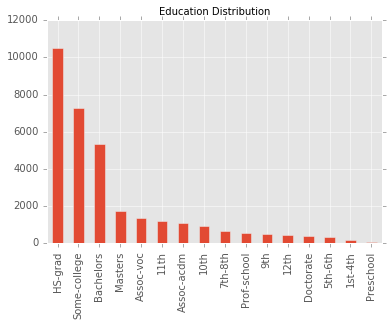

In [8]:
data['education'].value_counts().plot(kind="bar")
plt.title('Education Distribution',fontsize=10) 
plt.show()

### Вопрос 5
Найти среднее и стандартное отклонение переменной "final weight" (fnlwgt) для разведённых людей?

In [9]:
print("Average of fnlwgt for divorced is %.2f" % (np.mean(data[data['marital-status']=="Divorced"]['fnlwgt'])))
print("Std of fnlwgt for divorced is %.2f" % (np.std(data[data['marital-status']=="Divorced"]['fnlwgt'])))

Average of fnlwgt for divorced is 185802.79
Std of fnlwgt for divorced is 105634.90


### Вопрос 6
Правда ли, что люди, зарабатывающие более 50 тыс. в основном имеют высшее образование?

In [10]:
educ = data[data['50K']=='>50K']['education'].value_counts().to_dict()
print("Share of people with >50k income and higher education is %.2f" % 
((educ.get('Bachelors')+educ.get('Masters')+educ.get('Doctorate'))/data[data['50K']=='>50K']['education'].count()))

Share of people with >50k income and higher education is 0.44


__Answer:__ the statement is incorrect

### Вопрос 7
Каков максимальный возраст мужчин и женщин каждой расы?

In [11]:
data.groupby(['race', 'sex'])['age'].max()

race                sex   
Amer-Indian-Eskimo  Female    80
                    Male      82
Asian-Pac-Islander  Female    75
                    Male      90
Black               Female    90
                    Male      90
Other               Female    74
                    Male      77
White               Female    90
                    Male      90
Name: age, dtype: int64

### Вопрос 8
Люди из каких стран работают как фермеры/рыбаки?

In [12]:
data[data['occupation']=='Farming-fishing']['native-country'].unique()

array(['United-States', 'Cambodia', 'Poland', 'Guatemala', 'Mexico',
       'England', nan, 'Philippines', 'Italy', 'Puerto-Rico', 'Vietnam',
       'Germany', 'Japan', 'Canada', 'Yugoslavia', 'Cuba', 'Portugal',
       'El-Salvador', 'Hong', 'Ireland', 'France'], dtype=object)

### Вопрос 9
Рассмотрим два отношения 1) количество мужчин-бакалавров к количеству мужчин-магистров и 2) количество женщин-бакалавров к количеству женщин-магистров. Какое отношение больше?


In [13]:
f = data[(data['sex']=='Male') & (
data['education']=='Bachelors')].count()[0] / data[(data['sex']=='Male') & (data['education']=='Masters')].count()[0]
s = data[(data['sex']=='Female') & (
data['education']=='Bachelors')].count()[0] / data[(data['sex']=='Female') & (data['education']=='Masters')].count()[0]
print('Male bachelors to masters is %.4f \nFemale bachelors to masters is %.4f' % (f,s))

Male bachelors to masters is 3.1474 
Female bachelors to masters is 3.0205


__Answer:__ bachelors to masters ratio for males is higher

### Вопрос 10
Каково максимальное количество рабочих часов в неделю? Как много людей работают столько часов в неделю? Каков их заработок?

In [14]:
MaxWorkHour = data['hours-per-week'].max()
print('Maximum number of working hours per week is', MaxWorkHour)

Maximum number of working hours per week is 99


In [15]:
print('Total number of people working', MaxWorkHour, 'hours per week is', len(data[data['hours-per-week']==99]), 
      'with the following earnings:')
data[data['hours-per-week']==99]['50K'].value_counts()

Total number of people working 99 hours per week is 85 with the following earnings:


<=50K    60
>50K     25
Name: 50K, dtype: int64